<a href="https://colab.research.google.com/github/NandiniMarepalli/AI_ML_Internship_projects/blob/main/Project_1_Retail_Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('customer_shopping_data.csv')
data.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [8]:
data.drop_duplicates(inplace=True) #removes duplicates
data.isnull().sum()  #check for nulls

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [62]:
# Basic KPIs

print("Total sales:",data['price'].sum())
print("Total Transactions:", data['invoice_no'].nunique())
print("Unique Customers:", data['invoice_no'].nunique)

Total sales: 68551365.91
Total Transactions: 99457
Unique Customers: <bound method IndexOpsMixin.nunique of 0        I138884
1        I317333
2        I127801
3        I173702
4        I337046
          ...   
99452    I219422
99453    I325143
99454    I824010
99455    I702964
99456    I232867
Name: invoice_no, Length: 99457, dtype: object>


In [23]:
#changing the datatype of invoice_date

data['invoice_date']=pd.to_datetime(data['invoice_date'],dayfirst=True)   #converts string dates to datetime format
data['Day']=data['invoice_date'].dt.day_name()
data['Month']=data['invoice_date'].dt.month_name()
data['MonthNo']=data['invoice_date'].dt.month
data['year']=data['invoice_date'].dt.year
data.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Day,Month,MonthNo,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,Friday,August,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Sunday,December,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,Tuesday,November,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Sunday,May,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,Sunday,October,10,2021


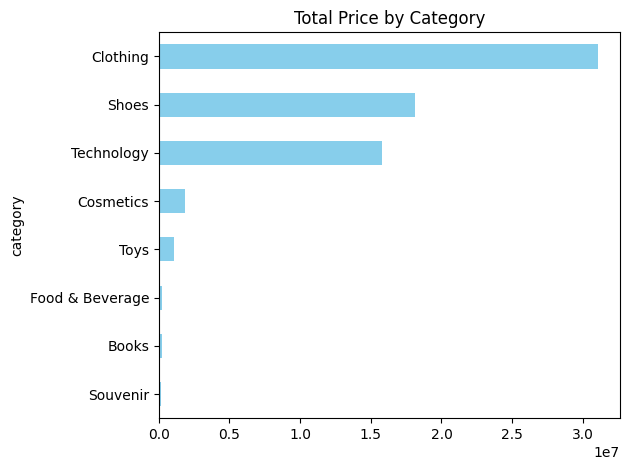

In [65]:
#price by category
category_sales=data.groupby('category')['price'].sum().sort_values()
category_sales.plot(kind='barh', color='skyblue')
plt.title("Total Price by Category")
plt.tight_layout()
plt.show()

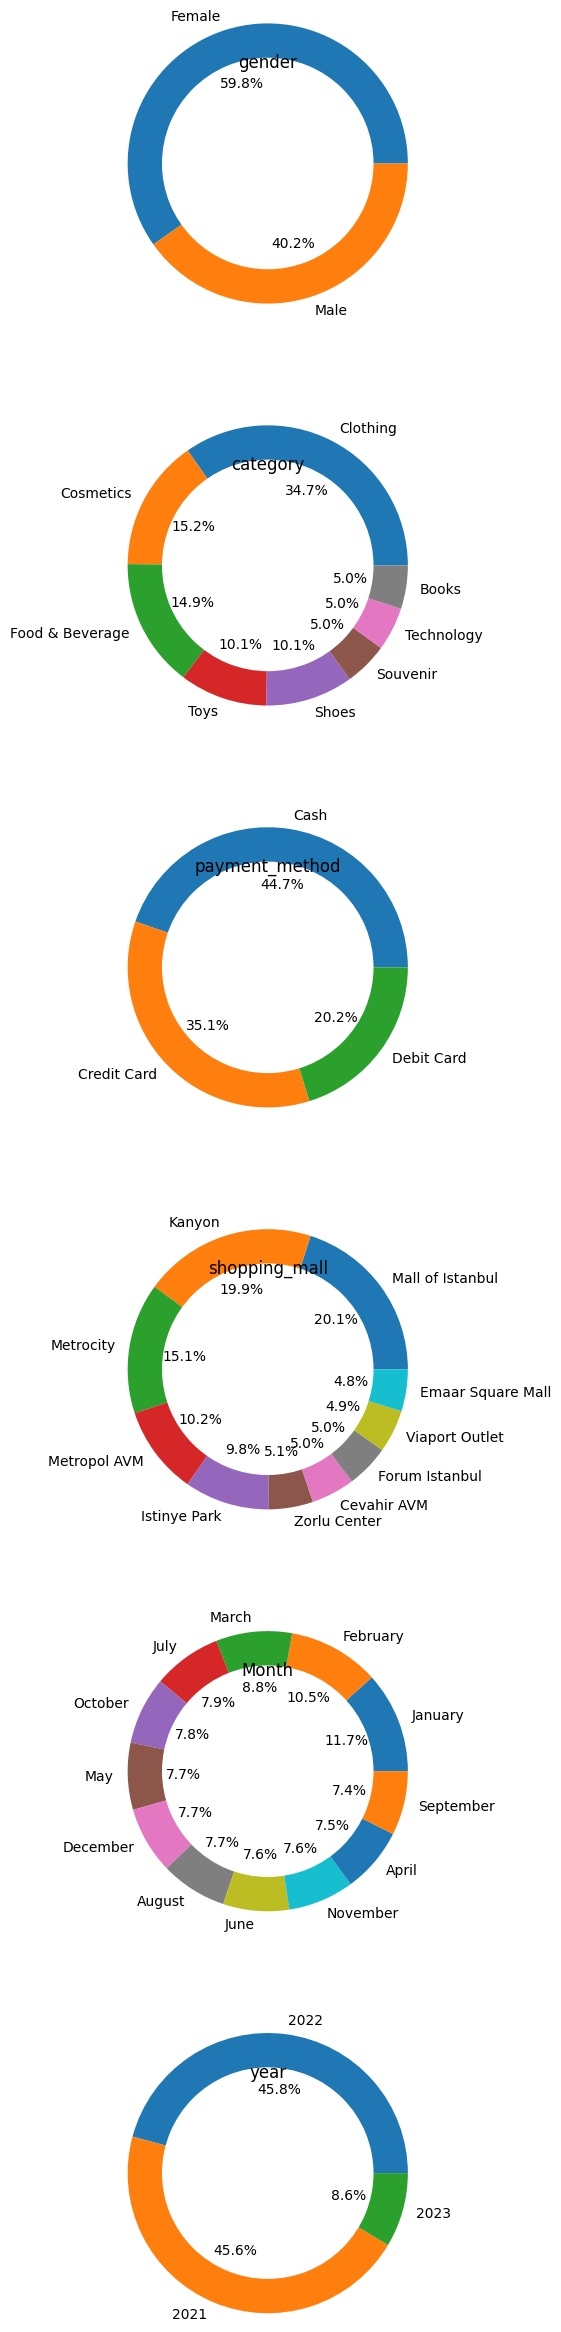

In [41]:
# UNIVARIATE ANALYSIS

#Order distribution based on
#'gender', 'category', 'payment_method', 'shoping_mall', 'month', 'year'

cols=['gender','category','payment_method','shopping_mall','Month','year']

fig, axes=plt.subplots(len(cols),1,figsize=(6,len(cols)*4))

for i, col in enumerate(cols):
  counts=data[col].value_counts()
  axes[i].pie(counts.values.tolist(),labels=counts.keys(),autopct='%0.1f%%', radius=2)
  axes[i].pie([1],colors=['w'],radius=1.5, wedgeprops={'edgecolor':'white'})
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

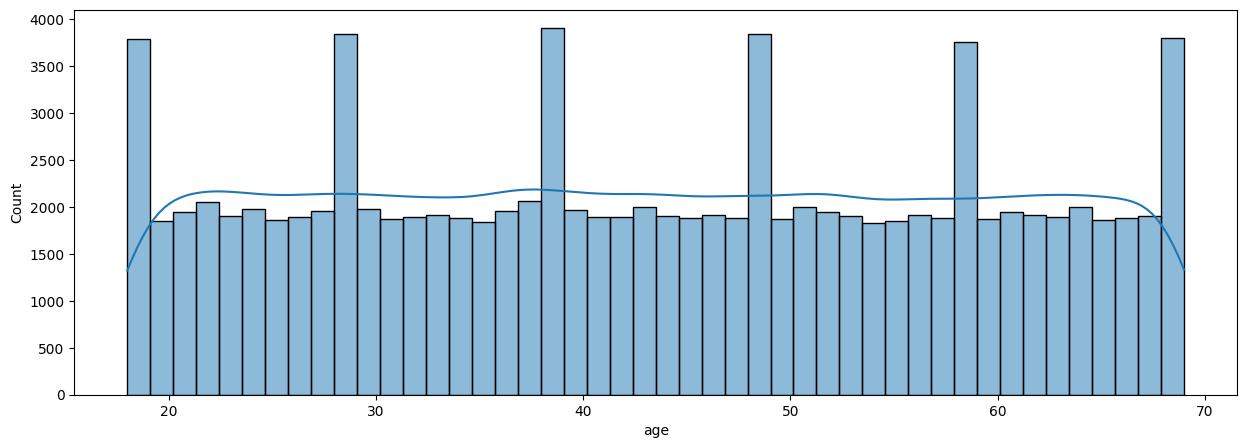

In [49]:
fig, ax=plt.subplots(figsize=(15,5))
sns.histplot(data['age'],kde=True,ax=ax)

<Axes: xlabel='price', ylabel='Count'>

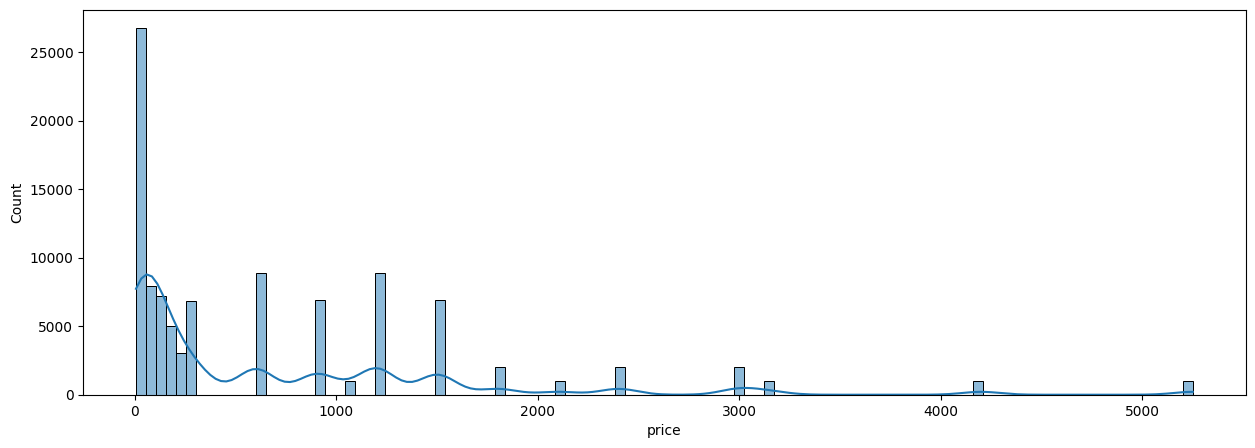

In [48]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(data['price'],kde=True,ax=ax)

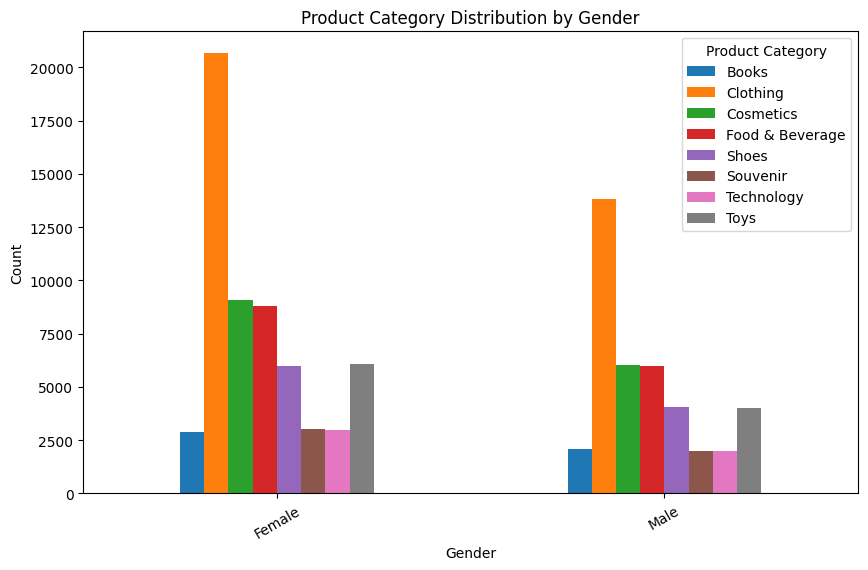

In [55]:
#Bivariate analysis
#category vs gender

product_category_count=data.groupby('gender')['category'].value_counts()

product_category_count.unstack().plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Product Category Distribution by Gender')
plt.legend(title='Product Category')
plt.xticks(rotation=30)
plt.show()

<Axes: xlabel='gender'>

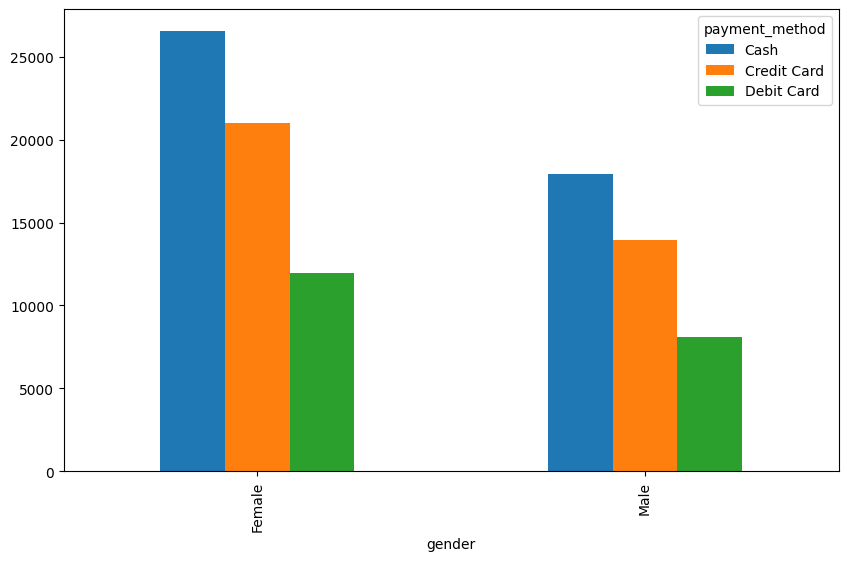

In [59]:
# Payment type with respect to gender

payment_type_count=data.groupby('gender')['payment_method'].value_counts()

payment_type_count.unstack().plot(kind='bar', stacked=False, figsize=(10, 6))

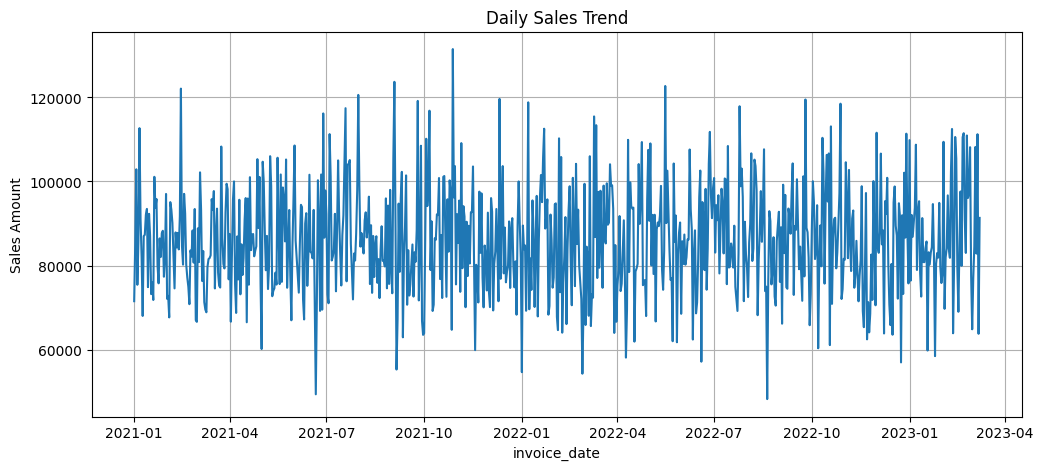

In [68]:
daily_sales=data.groupby(data['invoice_date'].dt.date)['price'].sum()
daily_sales.plot(figsize=(12, 5), title='Daily Sales Trend')
plt.ylabel("Sales Amount")
plt.grid()
plt.show()